# Introduction

This capstone looks at the Malnutrition across the world dataset from Kaggle. The datasets are available here: https://www.kaggle.com/ruchi798/malnutrition-across-the-globe. 

The capstone answers the following questions:
1. What is the average proportion of the underweight by country's income group?
2. What are top-5 countries with highest proportion of the underweight? 
3. What is the average proportion of all malnutrition types by country's income group
4. What are top-5 countries with highest proportion of the overweight in 2018? 
How has the country Tunisia developed over years in terms of the proportion of the overweight? 
6. Is there a correlation between income group & under/overweight?



Let's first import necessary modules and data, first.

In [8]:
# Load the Pandas libraries with alias 'pd' 
import pandas as pd 


data = pd.read_csv("malnutrition-estimates.csv")
data2 = pd.read_csv("country-wise-average.csv") 

#Let's do a left join on column "Country".
data.set_index('Country').join(data2.set_index('Country'), rsuffix='_df2')

#Let's preview the data
data.head()

,Unnamed: 0,ISO code,Country,Survey Year,Year,Income Classification,LDC,LIFD,LLDC or SID2,Survey Sample (N),Severe Wasting,Wasting,Overweight,Stunting,Underweight,Notes,Report Author,Source,Short Source,U5 Population ('000s)
0,0,AFG,AFGHANISTAN,1997,1997,0,1.0,1.0,1.0,"4,846",NaN,18.2,6.5,53.2,44.9,Converted estimates,CIET International,Afghanistan 1997 multiple indicator baseline (...,MICS,3838.877
1,1,AFG,AFGHANISTAN,2004,2004,0,1.0,1.0,1.0,946,3.5,8.6,4.6,59.3,32.9,NaN,"Ministry of Public Health (Afghanistan), UNICE...",Summary report of the national nutrition surve...,NNS,4789.353
2,2,AFG,AFGHANISTAN,2013,2013,0,1.0,1.0,1.0,"44,26,469",4.0,9.5,5.3,40.4,24.6,NaN,"Ministry of Public Health, UNICEF and the Aga ...",Afghanistan National Nutrition Survey 2013.,SMART,5444.573
3,3,AFG,AFGHANISTAN,2018,2018,0,1.0,1.0,1.0,NaN,1.6,5.1,4.1,38.2,19.1,NaN,KIT Royal Tropical Institute,Afghanistan Health Survey 2018,Other,5601.443
4,4,ALB,ALBANIA,1996-98,1997,2,0.0,0.0,0.0,"7,642",NaN,8.1,9.5,20.4,7.1,Converted estimates,"Institute of Public Health, Food and Nutrition...",National study on nutrition in Albania. Instit...,Other,309.225


# 1. Average proportion of the underweight by country's income group


In [9]:
# Let's recode Income Classification variable to have a better understandable result
rule = {0: 'Low Income', 1: 'Lower Middle Income', 2: 'Upper Middle Income', 3: 'High Income'}
data['Income_Categorical'] = data['Income Classification']
data['Income Classification'] = data['Income Classification'].replace(rule)
data[['Income Classification','Underweight']].groupby('Income Classification').mean()

,Underweight
Income Classification,
High Income,3.564384
Low Income,23.560731
Lower Middle Income,20.300606
Upper Middle Income,7.748571


# 2. Top-5 countries with highest proportion of the underweight in 2018

In [10]:
data.loc[data['Year']==2018, ['Country', 'Underweight']].sort_values(by='Underweight',ascending=0).head(n=5)

,Country,Underweight
594,NIGER (THE),37.5
473,MADAGASCAR,26.4
622,PAKISTAN,23.1
63,BANGLADESH,21.9
605,NIGERIA,21.8


# 3. What is the average proportion of all malnutrition types for each income-level?

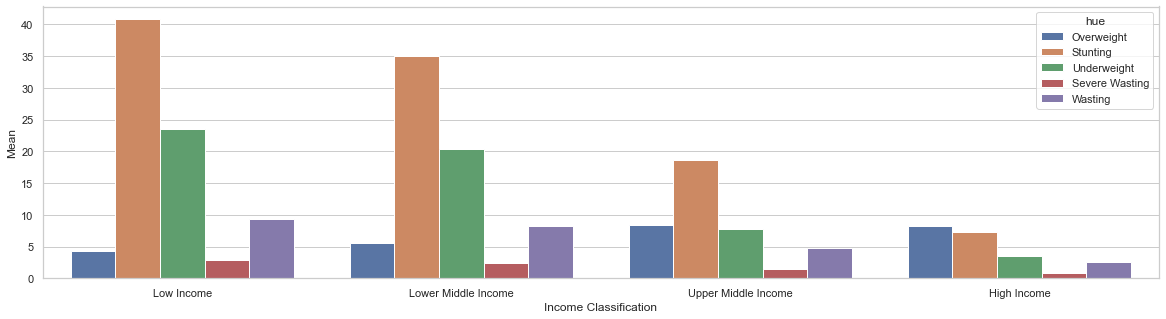

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Copy the below columns into a new dataframe
df_averages = data[['Income Classification', 'Overweight', 'Stunting', 'Underweight', 'Wasting', 'Severe Wasting']].copy()

# For each income type, calculate average of each malnutrition type.
df_overweight = df_averages.groupby(["Income Classification"]).mean()['Overweight'].reset_index(name='Mean')
df_stunting = df_averages.groupby(["Income Classification"]).mean()['Stunting'].reset_index(name='Mean')
df_underweight = df_averages.groupby(["Income Classification"]).mean()['Underweight'].reset_index(name='Mean')
df_wasting = df_averages.groupby(["Income Classification"]).mean()['Wasting'].reset_index(name='Mean')
df_severewasting = df_averages.groupby(["Income Classification"]).mean()['Severe Wasting'].reset_index(name='Mean')

# Assign legend values
df_overweight['hue']= 'Overweight'
df_stunting['hue']= 'Stunting'
df_underweight['hue'] = 'Underweight'
df_wasting['hue'] = 'Wasting'
df_severewasting['hue'] = 'Severe Wasting'

# Combine/concatenate all the bar plots in a single plot, with common x-axis (Income Classification).
result = pd.concat([df_overweight, df_stunting, df_underweight, df_severewasting, df_wasting])
sns.set(style="whitegrid")
plt.figure(figsize=(20,5))

# Use seaborn to plot the values.
sns.barplot(x="Income Classification",y='Mean',data=result, hue = 'hue', order = ['Low Income', 'Lower Middle Income', 'Upper Middle Income', 'High Income'])
plt.show()

# 4. Top-5 countries with highest proportion of the overweight in 2018

In [12]:
data.loc[data['Year']==2018, ['Country', 'Overweight']].sort_values(by='Overweight',ascending=0).head(n=5)

,Country,Overweight
802,TUNISIA,17.2
136,CAMEROON,11.0
540,MONGOLIA,10.5
647,PERU,8.6
809,TURKEY,8.1


# 5. How has Tunisia developed over the years?

Text(0, 0.5, 'Percentage')

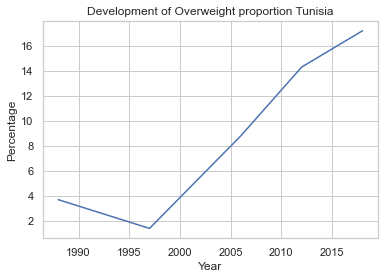

In [13]:
tunisia = data.loc[data['Country']=='TUNISIA', ['Year', 'Overweight']].dropna()

# !pip install matplotlib
import matplotlib.pyplot as plt
# !pip install numpy
import numpy as np

plt.plot(tunisia.iloc[:,0],tunisia.iloc[:,1])
plt.title('Development of Overweight proportion Tunisia')
plt.xlabel('Year')
plt.ylabel('Percentage')


# 6. Is there a correlation between income-level and overweight/underweight?

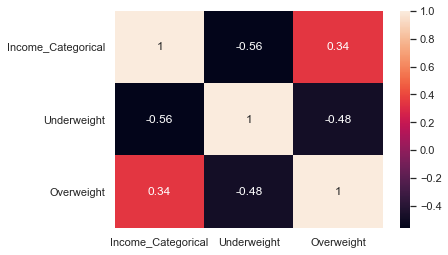

In [14]:
df = pd.DataFrame(data,columns=['Income_Categorical', 'Underweight', 'Overweight'])
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)

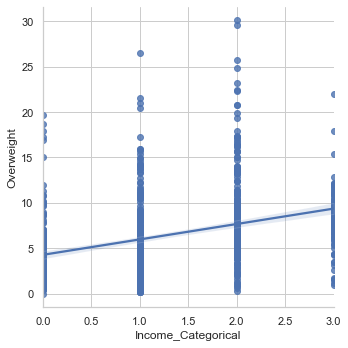

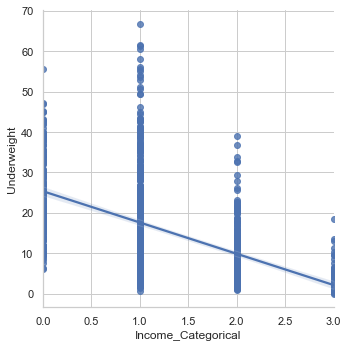

In [15]:
#Use seaborn to plot regression line for Overweight and Underweight values against different income-levels.
sns.lmplot(x="Income_Categorical", y="Overweight", data=data,fit_reg=True)
sns.lmplot(x="Income_Categorical", y="Underweight", data=data,fit_reg=True)